# レッスン2：ディープラーニングの基礎

このセクションでは、ディープラーニングの基本的な概念とPythonでの実装について学びます。具体的には、以下のトピックをカバーします。

- ニューラルネットワーク
- 畳み込みニューラルネットワーク（CNN）
- 再帰型ニューラルネットワーク（RNN）


## 用語の説明
- **ニューロン**: ニューロンは、人間の脳の神経細胞を模倣した概念で、ニューラルネットワークの中心的な要素です。それぞれのニューロンは、複数の入力を受け取り、それらを一つの出力に変換します。この出力は、次の層のニューロンへの入力となります。

- **入力層**: 入力層は、ニューラルネットワークの最初の層で、データを受け取る部分です。例えば、画像を認識するネットワークでは、各ピクセルの色情報が入力層に供給されます。

- **出力層**: 出力層は、ニューラルネットワークの最後の層で、最終的な結果を出力します。例えば、手書き数字の認識では、出力層は0から9までの10個のニューロンから成り、最も高い値を出力するニューロンが認識結果となります。

- **正規化**: 正規化は、データを一定の範囲や形状に変換する処理です。例えば、色の強度を0から1の範囲に変換したり、平均が0で標準偏差が1になるようにデータをスケーリングしたりします。これにより、機械学習モデルの学習が容易になります。

- **活性化関数**: 活性化関数は、ニューロンの出力を決定する関数です。例えば、シグモイド関数は出力を0から1の間に制限し、ReLU関数は負の入力を0に、正の入力はそのままにします。これにより、ニューラルネットワークは非線形の問題も学習できます。

- **損失関数**: 損失関数は、モデルの予測がどれだけ正解から外れているかを測定する関数です。例えば、二乗誤差損失は、予測と正解の差を二乗したものを使います。損失が小さいほど、モデルの予測は正確です。

- **最適化アルゴリズム**: 最適化アルゴリズムは、損失関数を最小化するようにモデルのパラメータを更新する方法です。例えば、勾配降下法は、損失関数の勾配（傾き）が最も急な方向にパラメータを少しずつ移動させて、損失を減らします。これにより、モデルはデータから学習して改善します。


## 基本的なニューラルネットワーク（多層パーセプトロン）

ここでは、Pythonの深層学習ライブラリであるKerasを用いて、ニューラルネットワークの基本的な実装を示します。具体的には、手書き数字の画像を分類するニューラルネットワークを訓練します。

まず、必要なライブラリをインポートします。これらのライブラリは、ニューラルネットワークの構築と訓練に必要な機能を提供します。



In [ ]:
# 必要なライブラリのインポート
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 乱数の種を固定
tf.random.set_seed(0)

次に、MNISTという手書き数字のデータセットをロードします。このデータセットは、0から9までの手書き数字の画像（28x28ピクセル）と、それぞれの画像が何の数字であるかを示すラベルから構成されています。データセットは訓練データとテストデータの2つに分けられ、訓練データでモデルを訓練した後、テストデータでモデルの性能を評価します。

In [ ]:
# データセットのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


データの前処理を行います。画像データは、各ピクセルが0から255の値を持つ2次元配列として表現されます。これを1次元配列に変換し、値を0から1の範囲に正規化します。また、ラベルデータは、各画像がどの数字であるかを示す整数ですが、これをカテゴリ形式（多クラス分類）に変換します。

In [ ]:
# データの前処理
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

次に、ニューラルネットワークのモデルを作成します。ここでは、全結合層（Dense）のみからなるシンプルなニューラルネットワークを作成します。全結合層とは、前の層の全てのニューロンが次の層の全てのニューロンと接続されている層のことを指します。

In [ ]:
# モデルの作成
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


このモデルは、入力層、隠れ層、出力層の3つの層から構成されています。入力層のニューロンの数は、入力データの次元数（ここでは28*28=784）と同じです。隠れ層は512のニューロンを持ち、活性化関数としてReLU（Rectified Linear Unit）を使用します。出力層は10のニューロンを持ち、活性化関数としてソフトマックスを使用します。ソフトマックス関数は、各出力ニューロンの出力を0から1の間の確率に変換します。



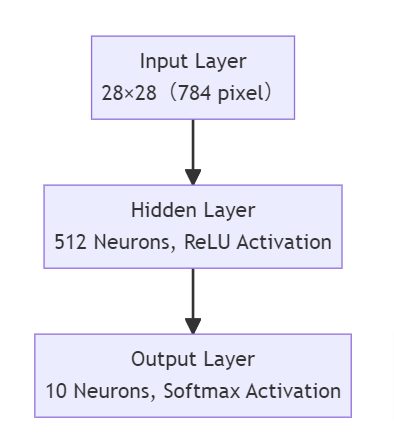

また、ReLU関数は以下のような形状になっています。

参考：ReLU関数　https://www.wolframalpha.com/input?i=ReLU+function


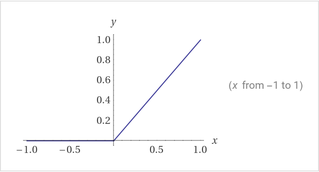

次に、モデルをコンパイルします。これは、モデルの学習方法を設定するステップです。損失関数、最適化アルゴリズム、評価指標を指定します。

In [ ]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

最後に、モデルを訓練します。訓練データを用いてモデルのパラメータを更新し、最適なパラメータを見つけ出します。エポック数は訓練データを何回繰り返して学習するかを指定します。バッチサイズは一度に学習するデータの数を指定します。

In [ ]:
# モデルの訓練
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 13s 24ms/step - loss: 0.2664 - accuracy: 0.9228 - val_loss: 0.1324 - val_accuracy: 0.9607
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1099 - accuracy: 0.9682 - val_loss: 0.1050 - val_accuracy: 0.9661
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0722 - accuracy: 0.9780 - val_loss: 0.0791 - val_accuracy: 0.9752
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 5/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0672 - val_accuracy: 0.9796


以下のコードは、訓練データと検証データ（ここではテストデータ）の精度と損失をそれぞれプロットします。これにより、モデルが訓練データにどれだけ適合しているか、また、未見のデータに対するモデルの性能を視覚的に理解することができます。

なお、'bo'は青色の丸を、'b'は青色の線を意味します。また、'Training acc'や'Validation acc'などは、グラフの凡例に表示されるラベルです。

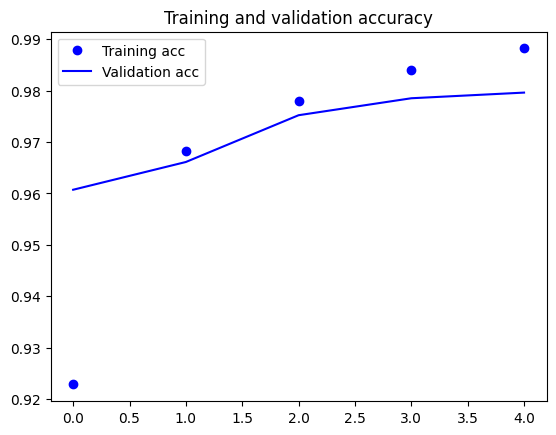

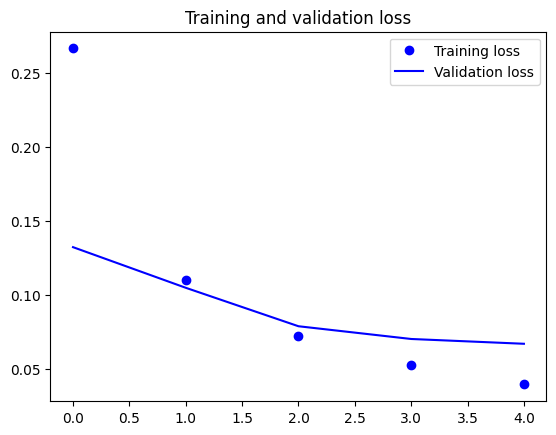

In [ ]:
import matplotlib.pyplot as plt

# 訓練の精度と損失値を取得
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 訓練データと検証データの精度をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# 訓練データと検証データの損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



以上が、ニューラルネットワークを用いた手書き数字の分類の基本的な流れです。一連のコードによって、手書き数字の画像を認識するニューラルネットワークのモデルを訓練し、新しい手書き文字に対してその数字がなんであるかを分類することができます。

## 畳み込みニューラルネットワーク（CNN）

畳み込みニューラルネットワーク（CNN）とは、画像や音声を認識するための特殊な種類の人工知能です。これは、画像の一部分の特徴を見つける「畳み込み層」、特徴の情報を簡単にする「プーリング層」、そして最終的にどのカテゴリに分類するかを決める「全結合層」の三つの部分から成り立っています。

以下に、PythonとKeras（人工知能を作るためのツール）を使って、CNNを作る基本的な手順を説明します。

まず、必要なツールを読み込みます。

In [ ]:
# 必要なライブラリのインポート
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 乱数の種を固定
np.random.seed(0)
tf.random.set_seed(0)

次に、学習に使うデータを読み込みます。今回はCIFAR-10を使います。CIFAR-10は、10種類のラベル（自動車、鳥、猫など）が付けられた32x32ピクセルのカラー画像60000枚から成るデータセットです。

In [ ]:
# データセットのロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

その後、データを適切な形に整形します。画像データは0から255の範囲の整数で表されますが、これを0から1の範囲に変換します。
また、ラベルデータ（y_trainとy_test）をカテゴリカル表現に変換します。これは、各ラベルを10次元のベクトルで表現する方法で、モデルの出力と一致させるために必要です。

In [ ]:
# データの前処理
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


そして、CNNのモデルを作ります。これは、畳み込み層(Conv2D)、プーリング層(MaxPooling2D)、全結合層(Dense)を順番に追加していきます。

In [ ]:
# モデルの作成開始
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

モデルを作ったら、それをどのように学習させるかを設定します。


In [ ]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


最後に、モデルを実際に学習させます。
今回は少し時間がかかるので、このウィンドウは開いたままにしておいてください。

In [ ]:
# モデルの訓練
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 81s 103ms/step - loss: 1.6790 - accuracy: 0.3951 - val_loss: 1.6580 - val_accuracy: 0.4282
Epoch 2/10
782/782 [==============================] - 77s 99ms/step - loss: 1.2715 - accuracy: 0.5502 - val_loss: 1.2968 - val_accuracy: 0.5437
Epoch 3/10
782/782 [==============================] - 75s 96ms/step - loss: 1.0806 - accuracy: 0.6216 - val_loss: 1.1639 - val_accuracy: 0.6026
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 0.9567 - accuracy: 0.6668 - val_loss: 1.0006 - val_accuracy: 0.6499
Epoch 5/10
782/782 [==============================] - 77s 98ms/step - loss: 0.8634 - accuracy: 0.6999 - val_loss: 1.0632 - val_accuracy: 0.6449
Epoch 6/10
782/782 [==============================] - 79s 101ms/step - loss: 0.7899 - accuracy: 0.7246 - val_loss: 1.0297 - val_accuracy: 0.6461
Epoch 7/10
782/782 [==============================] - 77s 98ms/step - loss: 0.7276 - accuracy: 0.7464 - val_loss: 0.9319 - val_accura

訓練済みのモデルの出力を確認してみましょう。

313/313 [==============================] - 4s 14ms/step


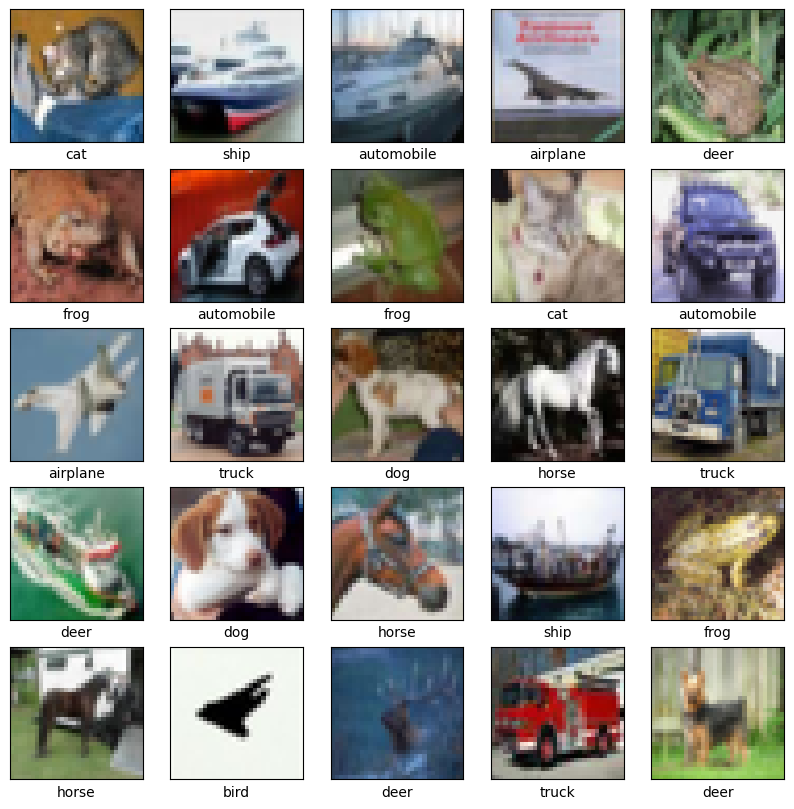

In [ ]:
# 予測
predictions = model.predict(X_test)

# # 予測結果を表示するための準備。CIFAR-10の各クラスに対応する名前をリストとして作成。
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 最初の25枚の画像と予測結果を表示
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()


以上が、CNNを作る基本的な手順です。

## 再帰型ニューラルネットワーク（RNN）

再帰型ニューラルネットワーク（RNN）は、時間の流れに沿ったデータ（例えば、文章や音声などのシーケンスデータ）を処理するのに適した人工知能の一種です。RNNは特別な「隠れ層」を持っており、これが過去の情報を覚えておく役割を果たします。そのため、時刻が進むごとにこの隠れ層の情報が更新され、新しい出力を生み出します。

以下に、PythonとKerasを使ったRNNの作り方を示します。以下のコードは映画のレビューが肯定的か否定的かを判定する人工知能を作ります。人工知能はレビューの文章を読んで、その内容が肯定的か否定的かを学習し、新しいレビューに対する予測を行います。

まずはデータの準備から始めます。

In [ ]:
# 必要なライブラリのインポート
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.datasets import imdb

# 映画のレビューデータセットの読み込み
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# データが長さの異なる文章からなるため、全ての文章が同じ長さになるように補正
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=500)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=500)


17464789/17464789 [==============================] - 0s 0us/step


次に、ニューラルネットワークのモデルを作ります。

In [ ]:
# モデルの作成開始
model = Sequential()
# Embedding層は単語をベクトル（数値の並び）に変換する
model.add(Embedding(10000, 32))
# SimpleRNN層がRNNの中心的な部分
model.add(SimpleRNN(32))
# Dense層は最終的な出力を生成する
model.add(Dense(1, activation='sigmoid'))


そして、このモデルをどのように学習させるかを設定し、実際にモデルを学習させます。

In [ ]:
# モデルの学習方法を決める
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# モデルの訓練
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 31s 192ms/step - loss: 0.6713 - acc: 0.5814 - val_loss: 0.6302 - val_acc: 0.6338
Epoch 2/10
157/157 [==============================] - 30s 190ms/step - loss: 0.4620 - acc: 0.7892 - val_loss: 0.3804 - val_acc: 0.8418
Epoch 3/10
157/157 [==============================] - 30s 192ms/step - loss: 0.3347 - acc: 0.8638 - val_loss: 0.5417 - val_acc: 0.7556
Epoch 4/10
157/157 [==============================] - 28s 181ms/step - loss: 0.2522 - acc: 0.9003 - val_loss: 0.3802 - val_acc: 0.8430
Epoch 5/10
157/157 [==============================] - 28s 182ms/step - loss: 0.1913 - acc: 0.9301 - val_loss: 0.5282 - val_acc: 0.7550
Epoch 6/10
157/157 [==============================] - 29s 182ms/step - loss: 0.1317 - acc: 0.9548 - val_loss: 0.4642 - val_acc: 0.8084
Epoch 7/10
157/157 [==============================] - 30s 191ms/step - loss: 0.0880 - acc: 0.9712 - val_loss: 0.5166 - val_acc: 0.8428
Epoch 8/10
157/157 [==============================] - 2

historyという変数には学習過程の情報が保存されています。これをプロットすることで学習の経過を視覚的に確認することができます。

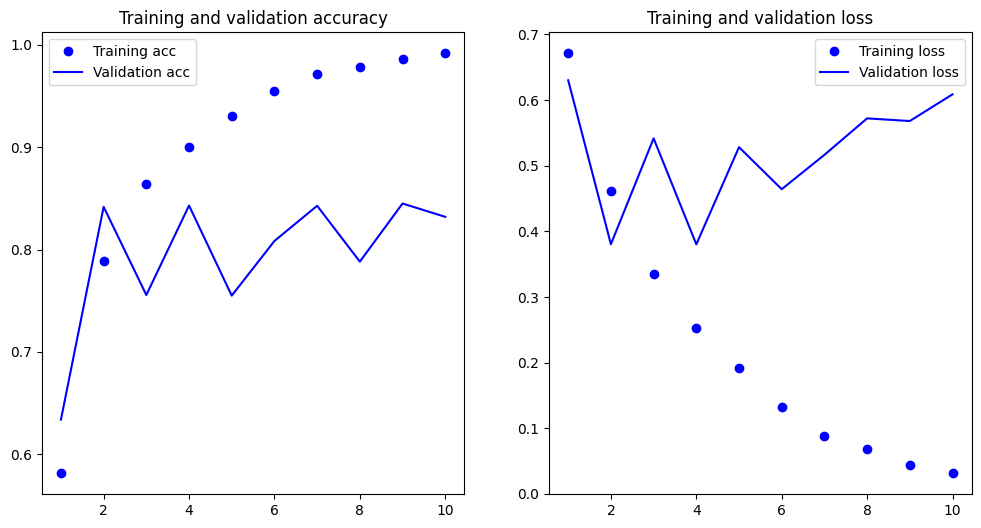

In [ ]:
import matplotlib.pyplot as plt

# 精度と損失の履歴を取得します
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 精度のプロット
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# 損失のプロット
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


以下のコードはテストデータセットの最初の10個のレビューに対する予測を表示します。予測値（prediction）は0から1の間の値で、値が0.5以上ならば肯定的なレビュー（'Positive'）、0.5未満ならば否定的なレビュー（'Negative'）と判断しています。
また、imdb.load_data()関数でロードしたデータは既に単語を数値に変換した形で提供されているため、実際のレビューのテキストとともに結果を表示するために、数値を再び単語に戻す処理が追加されています。

In [ ]:
# IMDBデータセットの単語とインデックスの対応関係を取得
word_index = imdb.get_word_index()

# インデックスと単語の対応関係（逆引き）を作成
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# テストデータから10個のサンプルを取り出し、予測と共に表示
samples = X_test[:10]
predictions = model.predict(samples)

for i, (sample, prediction) in enumerate(zip(samples, predictions)):
    # 数値を単語に戻す
    decoded_review = ' '.join([reverse_word_index.get(index - 3, '?') for index in sample if index > 3])
    print(f"Review {i+1}: {'Positive' if prediction > 0.5 else 'Negative'}")
    print(decoded_review, "\n")


1/1 [==============================] - 0s 182ms/step
Review 1: Negative
please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss 

Review 2: Positive
this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere with sexual tension and psychological it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by s

以上がRNNの作り方の一例です。

「epochs=10」は全データを10回繰り返し学習することを意味し、「batch_size=128」は128個のデータごとに学習を進めることを意味します。また、「validation_split=0.2」は、全データのうち20%を検証データ（モデルが学習に使わないで途中結果のチェックに使うデータ）として使うことを意味します。

このコードを実行すると、人工知能はレビューを読み、肯定的か否定的かを学習し、その結果を「history」という名前の変数に保存します。これにより、学習がうまく進んだかどうかを後から確認することが可能になります。

以上が、再帰型ニューラルネットワーク（RNN）の説明と基本的な実装例です。特に時系列データを扱う際には非常に役立つツールですので、ぜひ理解しておくと良いでしょう。